# class

# Problem: Simple Harmonic Oscillator (SHO) Simulation

A Simple Harmonic Oscillator (SHO) consists of a mass attached to a spring.  
The equation of motion is:


$$m \frac{d^2x}{dt^2} + kx = 0$$
where:
- $ m $ = mass of the object (kg)  
- $ k$ = spring constant (N/m)  
- $ x(t)$ = displacement from equilibrium (m)

The analytical solution of the motion is:

$$
x(t) = A \cos(\omega t + \phi)$$
$$x(0) = A \cos(\phi) = x0  ----1$$ 

$$v(t) = -A \sin(\omega t + \phi)$$
$$ v(0) = -A \sin(\phi) = v0 ----2$$

where:
- $\omega = \sqrt{\frac{k}{m}} $ is the angular frequency  
- $A$ and $\phi $ are determined from initial conditions.


In [30]:
import numpy as np 
import matplotlib.pyplot as plt

class shm:
    def __init__(self, mass, spring_cont, ini_x, ini_v):
        self.m = mass
        self.k = spring_cont
        self.x0 = ini_x
        self.v0 = ini_v

        self.w = np.sqrt(self.k/self.m)

        #----x-----
        self.A, self.phi = self.cal_amp_phi()
        #----x-----

    def cal_amp_phi(self):
        A = np.sqrt(self.x0**2 + (self.v0/self.w)**2) # A = sqrt(xo^2 + (vo/w)^2)
        phi = np.atan(-self.v0/self.x0) #--flag--
        return A, phi

    def position(self,t):
        return self.A * np.cos(self.w*t + self.phi)

    def vel(self,t):
        return -self.A * self.w * np.sin(self.w*t +self.phi)

    def results(self, duration=10, step =20):
        print(f"{'Time (s) ':>10} | {'x(m)':>15} | {'Velocity (m/s)':>15}")
        print("="*50)

        time = duration / (step-1)
        for i in range(step):
            t = i * time 
            x = self.position(t)
            v = self.vel(t)

            print(f"{t:10.3f} | {x:15.5f} | {v:15.5f} ")
        
    def plot_motion(self, duration=10, steps=1000):
        t = np.linspace(0, duration, steps)

        plt.figure(figsize=(12, 5))
        x = self.position(t)
        v = self.vel(t)
        plt.subplot(1, 2, 1)
        plt.plot(t, x, label='x(t) [Position]')
        plt.xlabel('Time (s)')
        plt.ylabel('Displacement (m)')
        plt.title('SHO Position vs Time')
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(t, v, label='v(t) [Velocity]', color='orange')
        plt.xlabel('Time (s)')
        plt.ylabel('Velocity (m/s)')
        plt.title('SHO Velocity vs Time')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()  

 Time (s)  |            x(m) |  Velocity (m/s)
     0.000 |        10.00000 |        -0.00000 
     0.526 |         3.83810 |       -20.64812 
     1.053 |        -7.05380 |       -15.84990 
     1.579 |        -9.25273 |         8.48143 
     2.105 |        -0.04877 |        22.36041 
     2.632 |         9.21529 |         8.68285 
     3.158 |         7.12261 |       -15.69529 
     3.684 |        -3.74784 |       -20.73086 
     4.211 |        -9.99952 |        -0.21812 
     4.737 |        -3.92799 |        20.56342 
     5.263 |         6.98432 |        16.00301 
     5.789 |         9.28929 |        -8.27921 
     6.316 |         0.14632 |       -22.35829 
     6.842 |        -9.17698 |        -8.88345 
     7.368 |        -7.19074 |        15.53918 
     7.895 |         3.65722 |        20.81162 
     8.421 |         9.99810 |         0.43622 
     8.947 |         4.01751 |       -20.47677 
     9.474 |        -6.91418 |       -16.15459 
    10.000 |        -9.32497 |         8.

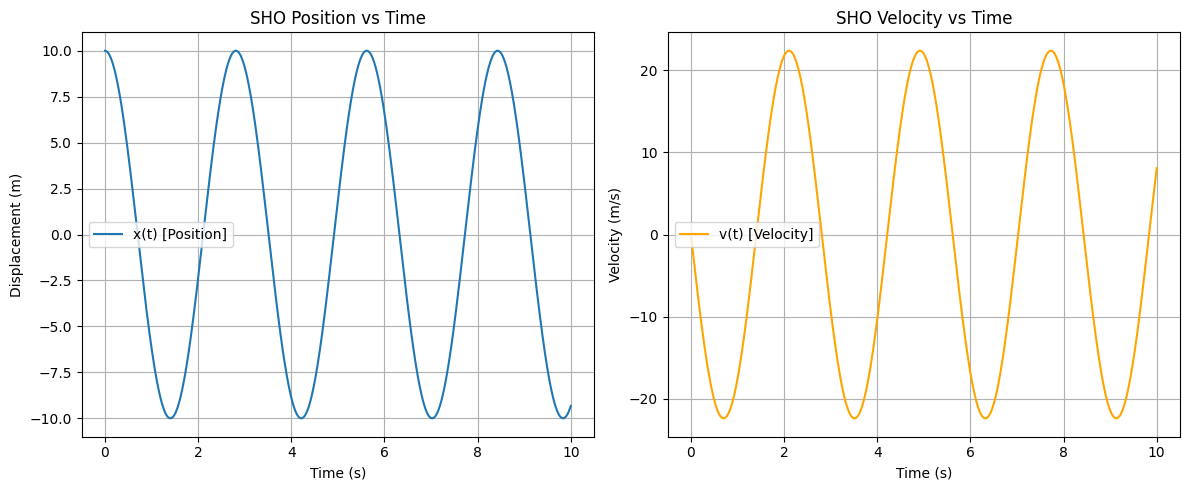

In [31]:
mass = 2
spring_cont = 10
ini_x  = 10 # mean = 0 
ini_v = 0 

oscillation = shm(mass,spring_cont,ini_x,ini_v)
oscillation.results(duration=10, step =20)
oscillation.plot_motion(duration=10)